c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.50941636 0.49058364]
 [0.5034478  0.4965522 ]
 [0.50960595 0.49039405]
 ...
 [0.50268285 0.49731715]
 [0.50214624 0.49785376]
 [0.49808383 0.50191617]]
[[167 488]
 [145 465]]


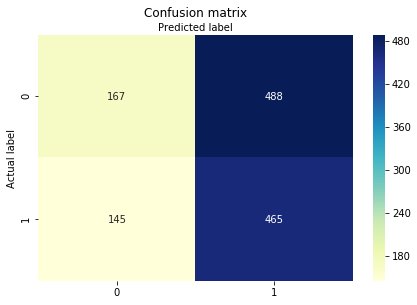

Accuracy: 0.49960474308300395


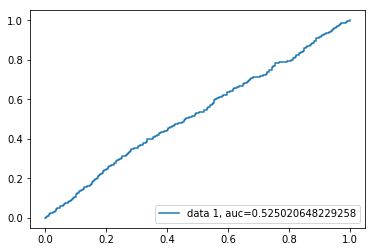

In [22]:
############## Classification#############
###########Logistic Regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# X, y = load_iris(return_X_y=True)
#
# ###### Devide data to test and train
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

data2= pd.read_csv("EC-H1-train.csv")
data1= pd.read_csv("EC-H1-test.csv")
##replacing
# bmedian = data2['Bare Nuclei'].median()
# data2['Bare Nuclei'].fillna(bmedian,inplace=True)

X_train=data2.values[:,1:]
y_train=data2.values[:,0]
X_test=data1.values[:,1:]
y_test=data1.values[:,0]

### Preprocess ###
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
# X_transformed = scaler.transform(X)



#####################LogisticRegression
logreg = LogisticRegression( )
logregmodel = logreg.fit(X_train, y_train)

y_pred = logregmodel.predict(X_test)
# array([0, 0])
print(logregmodel.predict_proba(X_test))
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08], [9.7...e-01, 2.8...e-02, ...e-08]])
logesticRscore = logregmodel.score(X_test, y_test)

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

######ploting
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#####Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

#### Roc Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [23]:


###########Logistic Regression#####
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logregmodel = logreg.fit(X_train, y_train)
y_pred = logregmodel.predict(X_test)



########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred , y_test )
print(cnf_matrix)

#####Metrics
print("logistic Regression_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[167 145]
 [488 465]]
logistic Regression_Accuracy: 0.49960474308300395
Precision: 0.4879328436516264
Recall: 0.7622950819672131


In [24]:
##########Naive Bayes #########
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNBmodel = GNB.fit(X_train, y_train)
y_pred = GNBmodel.predict(X_test)

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred,y_test )
print(cnf_matrix)

#####Metrics
print("GaussianNB_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F_measure:",metrics.f1_score(y_test, y_pred))





###### Classification with Linear Regression######
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LRmodel = LR.fit(X_train, y_train)
y_regpred = LRmodel.predict(X_test)
y_pred= [1 if x>=0.4 else 0 for x in y_regpred]

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred , y_test)
print(cnf_matrix)

#####Metrics
print("Linear Regression_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test , y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))





[[229 197]
 [426 413]]
GaussianNB_Accuracy: 0.5075098814229249
Precision: 0.4922526817640048
Recall: 0.6770491803278689
F_measure: 0.570048309178744
[[  1   0]
 [654 610]]
Linear Regression_Accuracy: 0.48300395256916995
Precision: 0.4825949367088608
Recall: 1.0


In [25]:

######QDA ###########
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA= QuadraticDiscriminantAnalysis()
QDAmodel = QDA.fit(X_train, y_train)
y_pred = QDAmodel.predict(X_test)

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#####Metrics
print("QDA_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test , y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))




[[ 36 619]
 [ 33 577]]
QDA_Accuracy: 0.48458498023715413
Precision: 0.48244147157190637
Recall: 0.9459016393442623


c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [26]:


######LDA ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis()
LDAmodel = LDA.fit(X_train, y_train)
y_pred = LDAmodel.predict(X_test)

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred ,y_test )
print(cnf_matrix)

#####Metrics
print("LDA_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test , y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


[[256 213]
 [399 397]]
LDA_Accuracy: 0.516205533596838
Precision: 0.49874371859296485
Recall: 0.6508196721311476


c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [27]:


######SVM ###########
from sklearn.svm import SVC
Svm= SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',
 coef0=0.0, shrinking=True, probability=False, tol=0.001,
 cache_size=200, class_weight=None, verbose=False, max_iter=-1,
 decision_function_shape='ovo', random_state=None)


In [28]:

Svmmodel = Svm.fit(X_train, y_train)
y_pred = Svmmodel.predict(X_test)

########Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred ,y_test )
print(cnf_matrix)

#####Metrics
print("SVM_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test , y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


[[  0   0]
 [655 610]]
SVM_Accuracy: 0.48221343873517786
Precision: 0.48221343873517786
Recall: 1.0


In [29]:
# from sklearn.model_selection import LeaveOneOut
# X = X_train
# y = y_train
# loo = LeaveOneOut()
# loo.get_n_splits(X)
#
#
# for train_index, test_index in loo.split(X):
#    # print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    # print(X_train, X_test, y_train, y_test)
